Выполнил лабу и чуть чуть эксперементировал  с  numpy   и scipy

Базовый массив: [3 4 1]
Тип: <class 'numpy.ndarray'>
После изменения: [3 3 1]
Приведение типа: [3 3 1]

Матрица:
 [[ 0.  1.]
 [-1.  0.]]
Определитель: 1.0
След: 0.0

QR разложение:
Q=
 [[0. 1.]
 [1. 0.]] 
R=
 [[-1.  0.]
 [ 0.  1.]]

SVD разложение:
U=
 [[0. 1.]
 [1. 0.]] 
Σ= [1. 1.] 
Vt=
 [[-1. -0.]
 [ 0.  1.]]

3D тензор (2x3x4):
 [[[4 4 9 9]
  [5 0 2 4]
  [8 0 5 9]]

 [[9 4 9 3]
  [2 9 1 3]
  [3 4 6 5]]]
Тензорное сжатие: (4, 4)

Логическая маска: [False  True  True  True]
Отфильтрованные данные: [5 6 7]


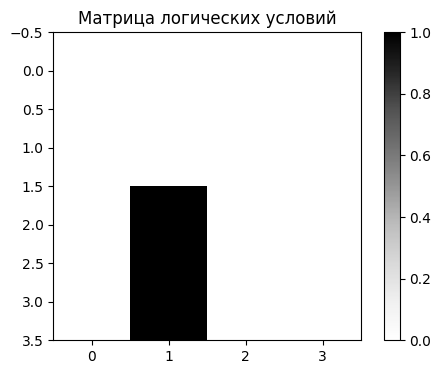


Особые значения: [ 1. nan inf]
isnan: [False  True False]
isinf: [False False  True]

Статистика:
Медиана: 0.004598122210760428
Мода: -0.23


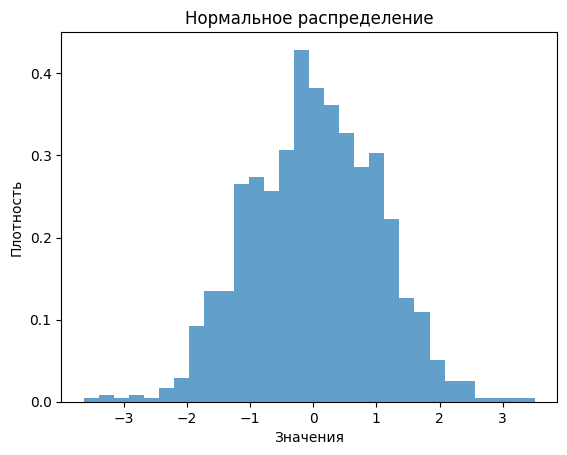

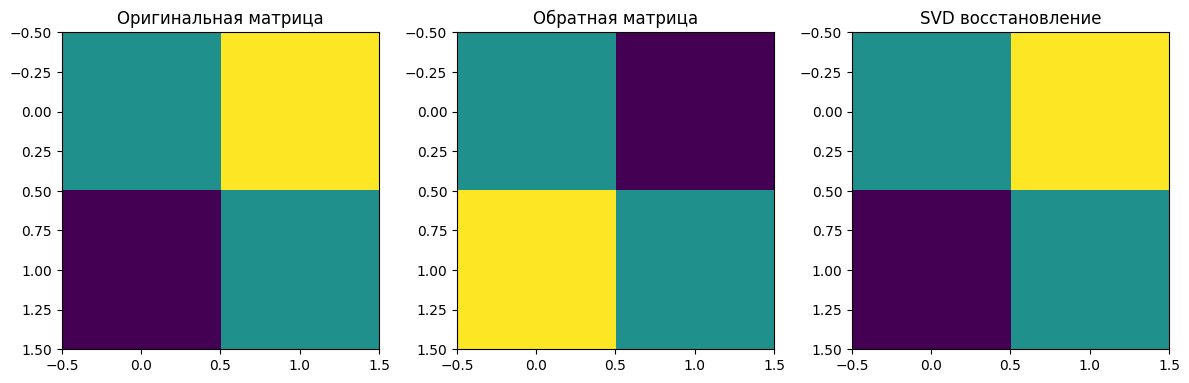


Результат интегрирования: 0.746824 ± 8.29e-15

Первые 3 строки сохраненных данных:
[[ 0.   0.5  1.   1.5  2.   2.5  3.   3.5  4.   4.5]
 [ 5.   5.5  6.   6.5  7.   7.5  8.   8.5  9.   9.5]
 [10.  10.5 11.  11.5 12.  12.5 13.  13.5 14.  14.5]]

Горизонтальное объединение:
[2 5 6 7 9 7 8 9]

Вертикальное объединение:
[[2 5 6 7]
 [9 7 8 9]]

Значения: [0.+1.j 0.-1.j]
Зекторы:
 [[0.70710678+0.j         0.70710678-0.j        ]
 [0.        +0.70710678j 0.        -0.70710678j]]

Произведение:
[[2. 3. 4.]
 [4. 6. 8.]]


In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import svd, qr
from scipy.integrate import quad
from scipy.special import erf
from scipy.stats import mode  

# 1. Базовые операции с массивами
a = np.array([3, 4, 1])
print("Базовый массив:", a)
print("Тип:", type(a))

# 2. Модификации массива
a[1] = 3
print("После изменения:", a)

# 3. Работа с типами данных
a = a.astype(np.int64)
a[1] = 3.5  #  приведение к int
print("Приведение типа:", a)

# 4. Матричные операции
matrix = np.array([[0.0, 1.0], [-1.0, 0.0]])
print("\nМатрица:\n", matrix)
print("Определитель:", np.linalg.det(matrix))
print("След:", np.trace(matrix))

# 5. Декомпозиции матриц
Q, R = qr(matrix)
U, S, Vt = svd(matrix)
print("\nQR разложение:\nQ=\n", Q, "\nR=\n", R)
print("\nSVD разложение:\nU=\n", U, "\nΣ=", S, "\nVt=\n", Vt)

# 6. Тензорные операции
tensor = np.random.randint(0, 10, (2, 3, 4))
print("\n3D тензор (2x3x4):\n", tensor)
print("Тензорное сжатие:", np.tensordot(tensor, tensor, axes=([0,1],[0,1])).shape)

# 7. Логические операции
a = np.array([2, 5, 6, 7])
b = np.array([9, 7, 8, 9])
mask = (a > 5) | (b < 8)
print("\nЛогическая маска:", mask)
print("Отфильтрованные данные:", a[mask])

# 8. Визуализация 
plt.figure(figsize=(6, 4))
plt.imshow(np.outer(a > 5, b < 8), cmap='Greys')
plt.title("Матрица логических условий")
plt.colorbar()
plt.show()

# 9. Работа с масивом
special_arr = np.array([1, np.nan, np.inf])
print("\nОсобые значения:", special_arr)
print("isnan:", np.isnan(special_arr))
print("isinf:", np.isinf(special_arr))

# 10. Статистические вычисления 
data = np.random.normal(0, 1, 1000)
print("\nСтатистика:")
print("Медиана:", np.median(data))
print("Мода:", mode(data.round(2), keepdims=True).mode[0])  # Исправление

# 11. Визуализация
plt.hist(data, bins=30, density=True, alpha=0.7)
plt.title("Нормальное распределение")
plt.xlabel("Значения")
plt.ylabel("Плотность")
plt.show()

# 12. Визуализация матричных преобразований
plt.figure(figsize=(12,4))
plt.subplot(131)
plt.imshow(matrix, cmap='viridis')
plt.title("Оригинальная матрица")

plt.subplot(132)
plt.imshow(np.linalg.inv(matrix), cmap='viridis')
plt.title("Обратная матрица")

plt.subplot(133)
plt.imshow(U @ np.diag(S) @ Vt, cmap='viridis')
plt.title("SVD восстановление")
plt.tight_layout()
plt.show()

# 13. SciPy
def integrand(x): 
    return np.exp(-x**2)

result, error = quad(integrand, 0, 1)
print(f"\nРезультат интегрирования: {result:.6f} ± {error:.2e}")

# 14. Сохранение и загрузка данных
x = np.arange(0, 25, 0.5).reshape((5, 10))
np.savetxt('data.csv', x, delimiter=',', fmt='%.2f')
print("\nПервые 3 строки сохраненных данных:")
print(np.loadtxt('data.csv', delimiter=',')[:3])

# 15. Дополнительные операции с массивами
print("\nГоризонтальное объединение:")
print(np.hstack((a, b)))

print("\nВертикальное объединение:")
print(np.vstack((a, b)))

# 16.  векторы
eigenvalues, eigenvectors = np.linalg.eig(matrix)
print("\nЗначения:", eigenvalues)
print("Зекторы:\n", eigenvectors)

# 17. произведение
u = np.linspace(1, 2, 2)
v = np.linspace(2, 4, 3)
print("\nПроизведение:")
print(np.outer(u, v))